CGPA: 6.7, Predicted Package: 2.83
CGPA: 7.8, Predicted Package: 3.46
CGPA: 8.3, Predicted Package: 3.74


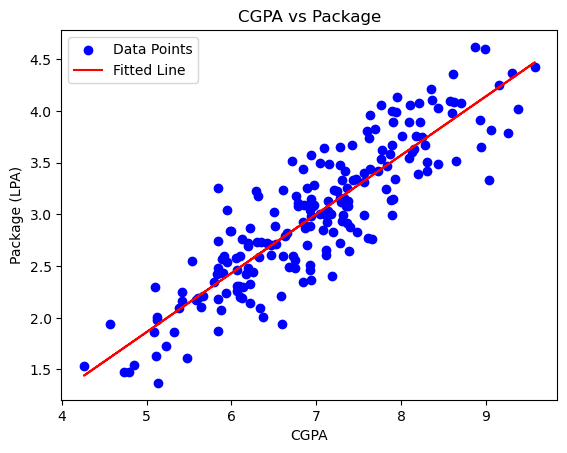

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SimpleLinearRegression:
    def __init__(self):
        self.slope = None
        self.intercept = None

    def fit(self, X, y):
        """
        Fit the linear model to the data.
        X: Input features (numpy array of shape (n_samples, 1))
        y: Target values (numpy array of shape (n_samples,))
        """
        X = np.array(X).flatten()
        y = np.array(y)
        
        # Calculate the means of X and y
        X_mean = np.mean(X)
        y_mean = np.mean(y)
        
        # Calculate the numerator and denominator for the slope
        numerator = np.sum((X - X_mean) * (y - y_mean))
        denominator = np.sum((X - X_mean) ** 2)
        
        # Calculate coefficients
        self.slope = numerator / denominator
        self.intercept = y_mean - (self.slope * X_mean)

    def predict(self, X):
        """
        Predict target values for the given input features.
        X: Input features (numpy array of shape (n_samples, 1))
        """
        X = np.array(X).flatten()
        return self.slope * X + self.intercept

# Function to load data from CSV file
def load_data(filename='placement.csv'):
    df = pd.read_csv(filename)
    X = df[['cgpa']].values
    y = df['package'].values
    return X, y

# Load data and create the model
csv_file_path = 'placement.csv'
X, y = load_data(csv_file_path)

model = SimpleLinearRegression()
model.fit(X, y)

# Test CGPA values for predictions
X_test = np.array([6.7, 7.8, 8.3]).reshape(-1, 1)
predictions = model.predict(X_test)

# Display the predicted packages for test CGPA values
for cgpa, package in zip(X_test.flatten(), predictions):
    print(f"CGPA: {cgpa}, Predicted Package: {package:.2f}")

# Plotting the data points and the fitted line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Fitted Line')
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')
plt.title('CGPA vs Package')
plt.legend()
plt.show()
